# Setup

Upload the spreadsheet containing subject landmark information before running. This file should be named something like "ML_allSubjsDistances_standardNorm.csv"

Once done, you should be able to run all cells without having to do anything else. If you're not running in Colab, you should set the above-mentioned input file destination and the output file save location (the latter is located at the end of the notebook).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import linregress
#import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn.utils import all_estimators
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
raw_dataset = pd.read_csv("/content/ML_allSubjsDistances_standardNorm.csv", na_values = "?")

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

subject subjID  trial  block  frameNumber  distance_RSSQ  confidence  \
10232       40  310GH    188      5          283       194.5590    0.220002   
10233       40  310GH    189      5          284       445.4505    0.851734   
10234       40  310GH    190      5          285       236.5099    0.457331   
10235       40  310GH    191      5          286       240.3719    0.269975   
10236       40  310GH    192      5          287       439.5849    0.209589   

       postHocRating  RT_takePic   RT_conf  expression     lm01x      lm01y  \
10232       0.525937    2.902330  1.840718          28  18.02686 -17.774660   
10233       0.461347    3.856875  1.218400          24  51.47388  61.304570   
10234       0.064730    5.387868  1.646745          27 -38.33325 -30.039920   
10235       0.882395    3.573967  1.365684          10 -34.08667  -5.237305   
10236       0.627067    3.015484  1.220172          29  52.01587 -18.025390   

           lm02x     lm02y     lm03x     lm03y      lm04x     lm04y  \
10232  -2.546631 -48.70581  -5.14209 -28.68677   8.047363 -35.87573   
10233  32.642580  39.38245  16.96240  36.35803  18.309570  14.01282   
10234 -45.671140 -33.54602 -42.21484 -21.14294 -47.772710 -26.40540   
10235 -11.401860  -4.27124 -14.80688 -13.24414 -44.955810 -32.04175   
10236  40.452880 -30.54370  38.46460 -34.44019   0.178467 -39.95142   

           lm05x      lm05y      lm06x      lm06y      lm07x      lm07y  \
10232   4.853271 -33.393310   3.098633 -24.527100   8.423828   1.240967   
10233  28.376220  21.001100  34.047610  15.140260  54.275880   0.667602   
10234 -51.256840   1.461304 -53.266360  -5.546509 -27.176760  19.174930   
10235 -29.770020 -31.206790 -11.298100 -39.092770 -35.316890 -30.802000   
10236  25.800050 -51.906010  16.530520 -28.066160  26.384520 -32.281250   

           lm08x      lm08y      lm09x     lm09y      lm10x      lm10y  \
10232   5.601318  -9.618896   3.457275  12.00244  -2.670410  -2.540527   
10233  58.761720 -11.025760  55.956540 -35.40369  56.359380 -60.621220   
10234  -7.815186  17.377080   6.225830  13.90613   2.743652  17.707400   
10235 -23.096680 -29.202150 -42.311770 -20.39966 -21.481930 -17.198000   
10236  47.025390 -61.991700  33.396000 -65.87939  30.936040 -81.507080   

           lm11x      lm11y      lm12x     lm12y      lm13x      lm13y  \
10232  -2.603027   0.946289 -12.860110 -20.26758   1.975098 -16.635250   
10233  55.380130 -74.049440  60.983890 -62.69250  56.037110 -29.861690   
10234  -6.033203  19.704960  -9.478027  21.60681 -12.826900  28.840700   
10235 -41.765620 -10.162600 -44.531980 -12.12671 -36.564700   1.777588   
10236  26.656490 -73.665530  21.214110 -65.72534  43.397220 -49.520020   

          lm14x      lm14y      lm15x      lm15y      lm16x     lm16y  \
10232  33.71875 -13.728760  -4.806641 -17.423100  -7.958496 -13.54590   
10233  25.72070 -32.792600  36.942140  -1.831909  30.559330 -22.79993   
10234 -34.19556  -0.435913 -31.033450   6.710083 -11.301510  11.93518   
10235 -37.95532   4.356934 -30.772710  25.874270 -59.909420  37.12280   
10236  48.08398 -43.704350  43.793950 -64.835940  20.693360 -50.75293   

          lm17x      lm17y      lm18x      lm18y      lm19x      lm19y  \
10232 -12.53906 -35.297120   2.003906  -0.953125 -22.879150   4.492676   
10233  52.81177 -12.870730   3.051025 -20.123410 -20.415770  -2.034058   
10234 -34.27856  -1.972778 -31.299800 -47.574830 -24.731450 -40.432010   
10235 -25.43823  12.398930  26.529790   4.936035  23.005130 -20.335690   
10236  24.38672 -18.610840  15.397460  -8.814941   1.352051 -25.707280   

           lm20x      lm20y      lm21x      lm21y      lm22x     lm22y  \
10232 -29.524410  18.058840  -1.274658  14.679200  -7.169678  21.39282   
10233 -18.718020 -16.276610 -23.759520 -30.685180 -28.800780 -45.09399   
10234 -24.745610 -42.070430  -8.802734 -42.096310 -10.608890 -40.20911   
10235  29.476070   8.714111  24.890140  11.781010  20.304200  14.84790   
10236  -4.757324 -24.507570  15.726

In [ ]:
subjects = dataset.subject.unique()
all_labels = ['confidence', 'postHocRating', 'RT_takePic', 'RT_conf']
#all_labels = ['confidence', 'postHocRating', 'RT_conf']
def set_labels(num):
  labels = all_labels.copy()
  label = labels.pop(num) # 0 for confidence, 1 for postHocRating
  drop_cols = ['subject', 'subjID', 'trial', 'block', 'frameNumber', 
              'distance_RSSQ', 'expression'] + labels
  print(label)
  return label, drop_cols

postHocRating


In [ ]:
for column in dataset.columns:
  isnasum = dataset[column].isna().sum()
  if isnasum > 0:
    print(column, isnasum)

confidence 123
postHocRating 5
RT_conf 123


In [ ]:
dataset = dataset.dropna()

# Define functions

In [ ]:
def analyze_subs(function, X_train=None, *args, **kwargs):

  results = {}
  
  for s in subjects:
    print(s, end=' ')
    results[str(s)] = function(s, X_train, *args, **kwargs)
  
  print()
  return results

In [ ]:
def get_stats(data):
  return data.describe().T

def norm(data, stats):
  return (data - stats['mean']) / stats['std']


# Functions for splitting data into positive and negative, then standardizing 
# the data above zero
def split_posneg(df):
  new_df = pd.DataFrame()
  for column in df.columns:
    if column.__contains__('lm'):
      pos = df[column].copy()
      neg = df[column].copy() * -1

      for series in [pos, neg]:
        for i in series.index:
          if series.loc[i] < 0:
            series.loc[i] = np.nan

      new_df[column + '_pos'] = pos
      new_df[column + '_neg'] = neg
    else:
      new_df[column] = df[column].copy()
  return new_df

def pn_norm(df):
  new_df = pd.DataFrame()
  for column in df.columns:
    std = np.nanstd(df[column])
    med = np.nanmedian(df[column])
    new_df[column] = df[column] / med
  return new_df.fillna(0)

def get_infs(df):
  infs = df[df.eq(np.inf).any(1)]
  if len(infs) > 0:
    print('Infs found: %i' %len(infs))
  return infs.index

#Model - Per Subject PCA

## Definitions

In [ ]:
all_landmarks = dataset.copy()[:10].drop(columns=drop_cols)
all_landmarks.pop(label)
all_landmarks = split_posneg(all_landmarks).columns

print(all_landmarks)

Index(['lm01x_pos', 'lm01x_neg', 'lm01y_pos', 'lm01y_neg', 'lm02x_pos',
       'lm02x_neg', 'lm02y_pos', 'lm02y_neg', 'lm03x_pos', 'lm03x_neg',
       ...
       'lm66y_pos', 'lm66y_neg', 'lm67x_pos', 'lm67x_neg', 'lm67y_pos',
       'lm67y_neg', 'lm68x_pos', 'lm68x_neg', 'lm68y_pos', 'lm68y_neg'],
      dtype='object', length=272)


In [ ]:
def PCA_LOOCV_posneg(s, X_train=None, n_comps=.8, do_pca=True, renorm=True, RTonly=False, logRT=False, *args, **kwargs):
  train_dataset = dataset[dataset.subject == s]
  #train_dataset.reset_index(inplace=True, drop=True)
  if RTonly:
    X_train = train_dataset[['RT_takePic', label]]
    if logRT:
      X_train['RT_takePic'] = np.log(X_train['RT_takePic'].copy())
  else:
    X_train = train_dataset.drop(columns=drop_cols)
  y_train = X_train.pop(label)

  # Normalize
  split = split_posneg(X_train)
  X_train = pn_norm(split)

  # Remove infs
  infs = get_infs(X_train)
  if len(infs) > 0:
    X_train = X_train.drop(infs)
    y_train = y_train.drop(infs)

  if do_pca:
    pca = PCA(n_components=n_comps) # 52
    pca.fit(X_train, y_train)

    comp_names = []
    for i in range(len(pca.components_)):
      comp_name = 'pc%.2i' % (i+1)
      comp_names.append(comp_name)

    X_train = pd.DataFrame(pca.transform(X_train), columns=comp_names)

  else:
    pca = None

  # Re-Normalize
  if renorm:
    stats = get_stats(X_train)
    X_train = norm(X_train, stats)

  loocv = model_selection.LeaveOneOut()
  model = linear_model.LinearRegression()
  #model = linear_model.Lasso(alpha=0.01)
  #model = linear_model.BayesianRidge()
  scores = model_selection.cross_validate(model, X_train, 
                                          y_train, cv=loocv, 
                                          scoring='neg_mean_squared_error',
                                          return_estimator=True)

  prediction = np.zeros(len(X_train))
  X = np.array(X_train)
  for i, estimator in enumerate(scores['estimator']):
    prediction[i] = estimator.predict(X[i].reshape(1,-1))

  # Reset to original indices
  prediction = pd.Series(prediction, index=y_train.index)
  X_train.index = y_train.index

  regression = linregress(y_train, prediction)
  plt.scatter(y_train, prediction)

  return {'scores': scores, 'prediction': prediction, 'regression': regression, 
          'X_train': X_train, 'y_train': y_train, 'pca': pca, 'split': split.fillna(0)}

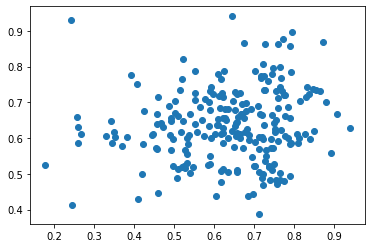

In [ ]:
# Test on one subject
sub = 37
label, drop_cols = set_labels(0)
example = PCA_LOOCV_posneg(sub, n_comps=66) # 0.9 variance

## Confidence

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 


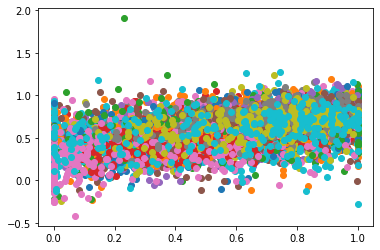

In [ ]:
pd.set_option('mode.chained_assignment', None)
label, drop_cols = set_labels(0)
results_confidence = analyze_subs(PCA_LOOCV_posneg, n_comps=66, do_pca=True, renorm=True)

## Similarity

In [ ]:
label, drop_cols = set_labels(1)
results_similarity = analyze_subs(PCA_LOOCV_posneg, n_comps=66, do_pca=True, renorm=True)

# Save results

## Save 4-way split features to dataframe

In [ ]:
all_split = pd.DataFrame()
for sub in results_confidence.values():
  all_split = all_split.append(sub['split'])
all_split.tail()

lm01x_pos  lm01x_neg  lm01y_pos  lm01y_neg  lm02x_pos  lm02x_neg  \
10104   18.02686    0.00000    0.00000  17.774660    0.00000   2.546631   
10105   51.47388    0.00000   61.30457   0.000000   32.64258   0.000000   
10106    0.00000   38.33325    0.00000  30.039920    0.00000  45.671140   
10107    0.00000   34.08667    0.00000   5.237305    0.00000  11.401860   
10108   52.01587    0.00000    0.00000  18.025390   40.45288   0.000000   

       lm02y_pos  lm02y_neg  lm03x_pos  lm03x_neg  lm03y_pos  lm03y_neg  \
10104    0.00000   48.70581     0.0000    5.14209    0.00000   28.68677   
10105   39.38245    0.00000    16.9624    0.00000   36.35803    0.00000   
10106    0.00000   33.54602     0.0000   42.21484    0.00000   21.14294   
10107    0.00000    4.27124     0.0000   14.80688    0.00000   13.24414   
10108    0.00000   30.54370    38.4646    0.00000    0.00000   34.44019   

       lm04x_pos  lm04x_neg  lm04y_pos  lm04y_neg  lm05x_pos  lm05x_neg  \
10104   8.047363    0.00000    0.00000   35.87573   4.853271    0.00000   
10105  18.309570    0.00000   14.01282    0.00000  28.376220    0.00000   
10106   0.000000   47.77271    0.00000   26.40540   0.000000   51.25684   
10107   0.000000   44.95581    0.00000   32.04175   0.000000   29.77002   
10108   0.178467    0.00000    0.00000   39.95142  25.800050    0.00000   

       lm05y_pos  lm05y_neg  lm06x_pos  lm06x_neg  lm06y_pos  lm06y_neg  \
10104   0.000000   33.39331   3.098633    0.00000    0.00000  24.527100   
10105  21.001100    0.00000  34.047610    0.00000   15.14026   0.000000   
10106   1.461304    0.00000   0.000000   53.26636    0.00000   5.546509   
10107   0.000000   31.20679   0.000000   11.29810    0.00000  39.092770   
10108   0.000000   51.90601  16.530520    0.00000    0.00000  28.066160   

       lm07x_pos  lm07x_neg  lm07y_pos  lm07y_neg  lm08x_pos  lm08x_neg  \
10104   8.423828    0.00000   1.240967    0.00000   5.601318   0.000000   
10105  54.275880    0.00000   0.667602    0.00000  58.761720   0.000000   
10106   0.000000   27.17676  19.174930    0.00000   0.000000   7.815186   
10107   0.000000   35.31689   0.000000   30.80200   0.000000  23.096680   
10108  26.384520    0.00000   0.000000   32.28125  47.025390   0.000000   

       lm08y_pos  lm08y_neg  lm09x_pos  lm09x_neg  lm09y_pos  lm09y_neg  \
10104    0.00000   9.618896   3.457275    0.00000   12.00244    0.00000   
10105    0.00000  11.025760  55.956540    0.00000    0.00000   35.40369   
10106   17.37708   0.000000   6.225830    0.00000   13.90613    0.00000   
10107    0.00000  29.202150   0.000000   42.31177    0.00000   20.39966   
10108    0.00000  61.991700  33.396000    0.00000    0.00000   65.87939   

       lm10x_pos  lm10x_neg  lm10y_pos  lm10y_neg  lm11x_pos  lm11x_neg  \
10104   0.000000    2.67041     0.0000   2.540527    0.00000   2.603027   
10105  56.359380    0.00000     0.0000  60.621220   55.38013   0.000000   
10106   2.743652    0.00000    17.7074   0.000000    0.00000   6.033203   
10107   0.000000   21.48193     0.0000  17.198000    0.00000  41.765620   
10108  30.936040    0.00000     0.0000  81.507080   26.65649   0.000000   

       lm11y_pos  lm11y_neg  lm12x_pos  lm12x_neg  lm12y_pos  lm12y_neg  \
10104   0.946289    0.00000    0.00000  12.860110    0.00000   20.26758   
10105   0.000000   74.04944   60.98389   0.000000    0.00000   62.69250   
10106  19.704960    0.00000    0.00000   9.478027   21.60681    0.00000   
10107   0.000000   10.16260    0.00000  44.531980    0.00000   12.12671   
10108   0.000000   73.66553   21.21411   0.000000    0.00000   65.72534   

       lm13x_pos  lm13x_neg  lm13y_pos  lm13y_neg  lm14x_pos  lm14x_neg  \
10104   1.975098     0.0000   0.000000   16.63525   33.71875    0.00000   
10105  56.037110     0.0000   0.000000   29.86169   25.72070    0.00000   
10106   0.000000    12.8269  28.840700    0.00000    0.00000   34.19556   
10107   0.000000    36.5647   1.777588    0.00000    0.00000   37.95532   
10108  43.397220     0.0

## Save predicted confidence as Series

In [ ]:
pred_confidence = pd.Series()
for sub in results_confidence.values():
  pred_confidence = pred_confidence.append(sub['prediction'])
pred_confidence.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


10104    0.501541
10105    0.297161
10106    0.575667
10107    0.419087
10108    0.325683
dtype: float64

## Save predicted similarity as Series

In [ ]:
pred_similarity = pd.Series()
for sub in results_similarity.values():
  pred_similarity = pred_similarity.append(sub['prediction'])
pred_similarity.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


10104    0.330595
10105    0.552545
10106    0.434934
10107    0.524504
10108    0.693716
dtype: float64

## Save PCA transformed data to dataframe

In [ ]:
pca_data = pd.DataFrame(columns=results['1']['X_train'].columns)
for sub in results_confidence.values():
  pca_data = pca_data.append(sub['X_train'])
if 'RT_takePic' in pca_data.columns:
  pca_data = pca_data.drop(columns='RT_takePic')

In [ ]:
pca_data.tail()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
10104 -0.447117 -0.291136  0.137614  0.609418 -1.971882  0.360434  0.473971   
10105  2.700967  0.396791 -0.048489 -0.850378  1.075573  0.089867  0.093426   
10106 -0.189553 -0.767633 -1.695377 -0.128175 -0.863061  0.454527 -1.409273   
10107 -1.020942  0.507569 -1.215249 -0.234164  1.106954  0.090939  0.519774   
10108  1.319537  1.997070 -0.558623 -0.218830  1.500361  1.713882 -0.090789   

           pc08      pc09      pc10      pc11      pc12      pc13      pc14  \
10104 -0.264419  0.361046 -1.019856 -1.031137 -0.514984 -0.063123 -1.011621   
10105  1.827837 -0.269405  0.953129  0.280991 -0.803950 -0.087242 -0.170227   
10106  0.702521  0.478077 -0.863491  0.008677  0.453561 -2.041628 -0.480338   
10107  0.072166  0.261207  2.625504 -0.456031  1.903557 -0.606414  0.678051   
10108 -2.067970  1.410820  1.144125  1.055512 -0.781394  2.655500 -2.444921   

           pc15      pc16      pc17      pc18      pc19      pc20      pc21  \
10104  0.281038  0.243263 -0.868448  0.792104 -1.754386 -0.001574  0.395014   
10105  0.618821  1.219973 -0.148038  0.699568 -0.782648  0.873781 -1.358045   
10106 -0.666524  1.269473 -0.505609 -0.122936  0.230329 -1.013718  0.086050   
10107  1.609157  1.267470 -0.355679 -1.262122  1.064632 -1.209082  0.246307   
10108  0.719100  0.494745 -0.399345  2.585542  0.823599 -1.427151  0.348719   

           pc22      pc23      pc24      pc25      pc26      pc27      pc28  \
10104  1.597193  0.217681  0.168010  1.048339 -1.953182  1.338989 -0.151059   
10105 -0.303778  2.197166 -1.096476 -0.554605  0.941691 -1.519469  0.066610   
10106 -0.265612  0.513244 -0.324994  0.216317  0.186875 -0.638098  1.314350   
10107 -0.403925 -1.438887  0.550158  0.478044 -0.630084  0.072637  1.402276   
10108 -0.648106 -0.279245  0.779114 -1.313067  1.985460  0.057552  0.453665   

           pc29      pc30      pc31      pc32      pc33      pc34      pc35  \
10104  0.436514 -0.077964  0.733332  0.713737 -0.945859 -1.933357  0.046701   
10105 -0.347161 -0.156276 -0.028393  1.574600 -2.586600 -1.037229 -0.902751   
10106  0.069289 -1.028763 -1.094901 -0.500422 -0.901927 -1.322008  1.257822   
10107  0.714044 -0.315700  1.192414  0.018978  0.406896 -0.427822 -0.285530   
10108  0.934888  0.503887 -0.669589 -2.753347  1.856545 -1.746412  1.280335   

           pc36      pc37      pc38      pc39      pc40      pc41      pc42  \
10104 -0.625004  0.429710  0.748857  0.066158  0.605223 -0.383007 -0.985993   
10105 -0.209963 -0.763843 -0.139397  0.002642  0.573872 -0.547356  0.881794   
10106 -2.380233 -2.301921  0.753722 -0.547487 -1.653405  0.386202 -0.180226   
10107 -0.981946 -0.607001 -1.086240  0.353369  1.233817  0.301092 -0.511447   
10108  0.916149  2.733389  0.315909  0.974770 -1.184581  0.005248 -0.773963   

           pc43      pc44      pc45      pc46      pc47      pc48      pc49  \
10104  0.028665 -0.307339  1.418768 -1.301331  3.143406 -0.873148  0.522618   
10105  0.702730 -0.088352  0.664156 -2.131075 -0.095965 -1.218770 -0.234762   
10106  1.685152  1.323069  0.016746  0.558587 -0.663453  0.708883 -1.180604   
10107  0.262887  0.112043 -0.027154 -0.685318 -0.160863 -0.091333  0.966156   
10108  1.647400 -0.144918  1.557566  0.318335 -1.115469  0.034585  1.607896   

           pc50      pc51      pc52      pc53      pc54      pc55      pc56  \
10104 -1.222910 -0.153173 -0.290681 -0.271587  1.101536 -0.691422  0.082892   
10105  1.415682  0.237716 -0.559049  0.489745  1.804611 -0.469332  0.232606   
10106 -0.516173  0.148306  1.541276  0.070030  1.114058 -2.231644  0.578856   
10107  0.121301  0.805295 -1.320709 -0.331438  0.152913 -0.537213  0.271350   
10108 -0.846406 -0.284131  0.242941  3.013536  1.565664 -0.011889  1.288652   

           pc57      pc58      pc59      pc60      pc61      pc62      pc63  \
10104 -1.313855 -0.061017  0.903398  1.625777  1.033368  0.662894 -0.093278   
10105  0.036839 -1.653163  0.393523  1.768671 -0.6951

## Calculate per trial landmark weights (coefficients)

In [ ]:
# Create list of component names
comp_names = []
for i in range(len(results_confidence['1']['X_train'].columns)):
  comp_name = 'pc%.2i' % (i+1)
  comp_names.append(comp_name)

In [ ]:
# Extract estimated landmark weights for each subject
lm_weight_names = ['w' + lm for lm in all_landmarks]
weights = {}

for sub in results_confidence.keys():
  print(sub, end=' ')
  components = pd.DataFrame(results_confidence[sub]['pca'].components_, 
    index=comp_names, 
    columns=all_landmarks)
  
  comps_df = pd.DataFrame(columns=all_landmarks)
  for i, estimator in enumerate(results_confidence[sub]['scores']['estimator']):
    coef = estimator.coef_
    comp = components.copy().transpose()
    for lm in all_landmarks:
      comp.loc[lm] = comp.loc[lm] * coef
    comps = comp.copy().transpose().sum()
    comps_df = comps_df.append(pd.DataFrame(comps).transpose())
  weights[sub] = comps_df

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

In [ ]:
# Combine subjects landmark weights into a single DF
lm_weights = pd.DataFrame(columns=all_landmarks)
for sub in weights.keys():
  lm_weights = lm_weights.append(weights[sub])

lm_weights.columns = lm_weight_names
lm_weights.index = pred_confidence.index
lm_weights.tail()

wlm01x_pos  wlm01x_neg  wlm01y_pos  wlm01y_neg  wlm02x_pos  wlm02x_neg  \
10104    0.004329    0.013888   -0.007329    0.007559    0.003002    0.013142   
10105    0.004407    0.014210   -0.010154    0.007956    0.004222    0.013555   
10106    0.004510    0.014509   -0.007328    0.007893    0.003696    0.013914   
10107    0.004322    0.014122   -0.007083    0.007534    0.003496    0.013382   
10108    0.004651    0.014096   -0.007245    0.007778    0.003693    0.013508   

       wlm02y_pos  wlm02y_neg  wlm03x_pos  wlm03x_neg  wlm03y_pos  wlm03y_neg  \
10104   -0.004128    0.002901    0.004579    0.011651   -0.011103    0.006584   
10105   -0.006182    0.002936    0.006258    0.012215   -0.013032    0.007069   
10106   -0.004319    0.002430    0.005290    0.012504   -0.011144    0.006412   
10107   -0.004244    0.002243    0.004889    0.012048   -0.011245    0.006226   
10108   -0.004021    0.002427    0.005183    0.012248   -0.011056    0.006519   

       wlm04x_pos  wlm04x_neg  wlm04y_pos  wlm04y_neg  wlm05x_pos  wlm05x_neg  \
10104    0.002900    0.011821   -0.005539    0.000465    0.003296    0.007611   
10105    0.004224    0.012153   -0.006534    0.001382    0.003941    0.007538   
10106    0.003412    0.012267   -0.005734    0.000602    0.003258    0.008127   
10107    0.003255    0.011861   -0.005568    0.000301    0.003445    0.007661   
10108    0.003255    0.011879   -0.005491    0.000614    0.003475    0.007691   

       wlm05y_pos  wlm05y_neg  wlm06x_pos  wlm06x_neg  wlm06y_pos  wlm06y_neg  \
10104   -0.002319    0.004441    0.003476    0.007100   -0.003297    0.006255   
10105   -0.003595    0.005713    0.004720    0.007013   -0.003718    0.006709   
10106   -0.002351    0.004451    0.004141    0.007524   -0.003185    0.006114   
10107   -0.002375    0.004351    0.004189    0.007208   -0.003190    0.006237   
10108   -0.002182    0.004729    0.004053    0.007054   -0.003106    0.006098   

       wlm07x_pos  wlm07x_neg  wlm07y_pos  wlm07y_neg  wlm08x_pos  wlm08x_neg  \
10104    0.003808    0.008445    0.001303    0.005502    0.000049   -0.004638   
10105    0.003549    0.008684    0.002006    0.006204   -0.000023   -0.003376   
10106    0.003718    0.008972    0.001554    0.005814   -0.000107   -0.004083   
10107    0.003600    0.009481    0.001625    0.005782    0.000150   -0.003645   
10108    0.003712    0.008941    0.001662    0.005840    0.000299   -0.003924   

       wlm08y_pos  wlm08y_neg  wlm09x_pos  wlm09x_neg  wlm09y_pos  wlm09y_neg  \
10104    0.013392   -0.001509   -0.009248    0.002481    0.013114   -0.006447   
10105    0.014727   -0.000688   -0.010042    0.002481    0.013165   -0.006556   
10106    0.014200   -0.001669   -0.009518    0.002341    0.013151   -0.005731   
10107    0.013877   -0.001480   -0.009176    0.003149    0.012863   -0.005900   
10108    0.014145   -0.001360   -0.009250    0.002453    0.013097   -0.005596   

       wlm10x_pos  wlm10x_neg  wlm10y_pos  wlm10y_neg  wlm11x_pos  wlm11x_neg  \
10104    0.000143   -0.010059    0.001158    0.004113   -0.004551   -0.007641   
10105    0.000008   -0.009520    0.002237    0.002922   -0.004905   -0.008711   
10106   -0.000019   -0.010000    0.002011    0.003852   -0.004549   -0.007841   
10107    0.000150   -0.009476    0.001836    0.003837   -0.004295   -0.006786   
10108    0.000176   -0.010189    0.002063    0.004236   -0.004499   -0.008100   

       wlm11y_pos  wlm11y_neg  wlm12x_pos  wlm12x_neg  wlm12y_pos  wlm12y_neg  \
10104    0.009003    0.002369   -0.004846   -0.001028   -0.005917    0.007019   
10105    0.010306    0.001498   -0.003740   -0.001480   -0.005035    0.006580   
10106    0.009351    0.002778   -0.004348   -0.001028   -0.005343    0.007045   
10107    0.009147    0.002688   -0.004046   -0.000391   -0.005743    0.006931   
10108    0.009257    0.003097   -0.004131   -0.001277   -0.005564    0.007086   

       wlm13x_pos  wlm13x_neg  wlm13y_pos  wlm13y_neg  wlm14x_pos  wlm14x_neg  \
10104   -0.002769    0.007914 

## Calculate adjusted distance (based on feature weights)

In [ ]:
weighted_distance_2afw_alt_base = np.multiply(all_split, lm_weights)
weighted_distance_2afw_alt_weighted = weighted_distance_2afw_alt_base.copy()

for i in range(len(weighted_distance_2afw_alt_base)):
  for j in range(len(weighted_distance_2afw_alt_base.loc[i])):
    if weighted_distance_2afw_alt_base.iloc[i,j] < 0:
      sign = -1
    else:
      sign = 1
    weighted_distance_2afw_alt_weighted.iloc[i,j] = (weighted_distance_2afw_alt_base.iloc[i,j]**2)*sign

weighted_distance_2afw_alt_sum = weighted_distance_2afw_alt_weighted.sum(axis=1)
weighted_distance_2afw_alt = weighted_distance_2afw_alt_sum.copy()

for i in range(len(weighted_distance_2afw_alt_sum)):
  if weighted_distance_2afw_alt_sum.loc[i] < 0:
    sign = -1
  else:
    sign = 1
  weighted_distance_2afw_alt.loc[i] = np.sqrt(abs(weighted_distance_2afw_alt_sum.loc[i]))*sign

weighted_distance_2afw_alt.tail()

## Combine into dataframe and save to file

In [ ]:
save_dataset = dataset.copy()
save_dataset['pred_confidence'] = pred_confidence
save_dataset['pred_similarity'] = pred_similarity
save_dataset = pd.concat([save_dataset, pca_data, all_split, lm_weights], axis=1)
save_dataset['weighted_distance'] = weighted_distance_2afw
save_dataset['weighted_distance_sign'] = weighted_distance_2afw_alt

save_dataset.tail()

subject subjID  trial  block  frameNumber  distance_RSSQ  confidence  \
10104       40  310GH    188      5          283       194.5590    0.220002   
10105       40  310GH    189      5          284       445.4505    0.851734   
10106       40  310GH    190      5          285       236.5099    0.457331   
10107       40  310GH    191      5          286       240.3719    0.269975   
10108       40  310GH    192      5          287       439.5849    0.209589   

       postHocRating  RT_takePic   RT_conf  expression     lm01x      lm01y  \
10104       0.525937    2.902330  1.840718          28  18.02686 -17.774660   
10105       0.461347    3.856875  1.218400          24  51.47388  61.304570   
10106       0.064730    5.387868  1.646745          27 -38.33325 -30.039920   
10107       0.882395    3.573967  1.365684          10 -34.08667  -5.237305   
10108       0.627067    3.015484  1.220172          29  52.01587 -18.025390   

           lm02x     lm02y     lm03x     lm03y      lm04x     lm04y  \
10104  -2.546631 -48.70581  -5.14209 -28.68677   8.047363 -35.87573   
10105  32.642580  39.38245  16.96240  36.35803  18.309570  14.01282   
10106 -45.671140 -33.54602 -42.21484 -21.14294 -47.772710 -26.40540   
10107 -11.401860  -4.27124 -14.80688 -13.24414 -44.955810 -32.04175   
10108  40.452880 -30.54370  38.46460 -34.44019   0.178467 -39.95142   

           lm05x      lm05y      lm06x      lm06y      lm07x      lm07y  \
10104   4.853271 -33.393310   3.098633 -24.527100   8.423828   1.240967   
10105  28.376220  21.001100  34.047610  15.140260  54.275880   0.667602   
10106 -51.256840   1.461304 -53.266360  -5.546509 -27.176760  19.174930   
10107 -29.770020 -31.206790 -11.298100 -39.092770 -35.316890 -30.802000   
10108  25.800050 -51.906010  16.530520 -28.066160  26.384520 -32.281250   

           lm08x      lm08y      lm09x     lm09y      lm10x      lm10y  \
10104   5.601318  -9.618896   3.457275  12.00244  -2.670410  -2.540527   
10105  58.761720 -11.025760  55.956540 -35.40369  56.359380 -60.621220   
10106  -7.815186  17.377080   6.225830  13.90613   2.743652  17.707400   
10107 -23.096680 -29.202150 -42.311770 -20.39966 -21.481930 -17.198000   
10108  47.025390 -61.991700  33.396000 -65.87939  30.936040 -81.507080   

           lm11x      lm11y      lm12x     lm12y      lm13x      lm13y  \
10104  -2.603027   0.946289 -12.860110 -20.26758   1.975098 -16.635250   
10105  55.380130 -74.049440  60.983890 -62.69250  56.037110 -29.861690   
10106  -6.033203  19.704960  -9.478027  21.60681 -12.826900  28.840700   
10107 -41.765620 -10.162600 -44.531980 -12.12671 -36.564700   1.777588   
10108  26.656490 -73.665530  21.214110 -65.72534  43.397220 -49.520020   

          lm14x      lm14y      lm15x      lm15y      lm16x     lm16y  \
10104  33.71875 -13.728760  -4.806641 -17.423100  -7.958496 -13.54590   
10105  25.72070 -32.792600  36.942140  -1.831909  30.559330 -22.79993   
10106 -34.19556  -0.435913 -31.033450   6.710083 -11.301510  11.93518   
10107 -37.95532   4.356934 -30.772710  25.874270 -59.909420  37.12280   
10108  48.08398 -43.704350  43.793950 -64.835940  20.693360 -50.75293   

          lm17x      lm17y      lm18x      lm18y      lm19x      lm19y  \
10104 -12.53906 -35.297120   2.003906  -0.953125 -22.879150   4.492676   
10105  52.81177 -12.870730   3.051025 -20.123410 -20.415770  -2.034058   
10106 -34.27856  -1.972778 -31.299800 -47.574830 -24.731450 -40.432010   
10107 -25.43823  12.398930  26.529790   4.936035  23.005130 -20.335690   
10108  24.38672 -18.610840  15.397460  -8.814941   1.352051 -25.707280   

           lm20x      lm20y      lm21x      lm21y      lm22x     lm22y  \
10104 -29.524410  18.058840  -1.274658  14.679200  -7.169678  21.39282   
10105 -18.718020 -16.276610 -23.759520 -30.685180 -28.800780 -45.09399   
10106 -24.745610 -42.070430  -8.802734 -42.096310 -10.608890 -40.20911   
10107  29.476070   8.714111  24.890140  11.781010  20.304200  14.84790   
10108  -4.757324 -24.507570  15.726

In [ ]:
save_dataset.to_csv('ML_results.csv')